In [83]:
#Gerekli Kütüphaneleri hazırladım.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import keras,tensorflow
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras import backend as k
from keras.datasets import cifar10

In [84]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()#test ve eğitim kümelerini oluşturdum.
train_images,test_images=train_images/255.0,test_images/255.0#resimleri standarilize ettim.

In [85]:
#Kümelerin boyutlarını inceledim
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


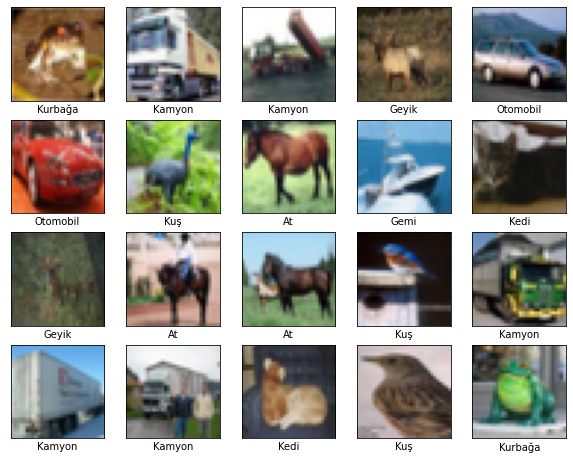

In [86]:
#İlk 20 resimi ekrana yazdırdım
colum_name=["Uçak","Otomobil","Kuş","Kedi","Geyik","Köpek","Kurbağa","At","Gemi","Kamyon"]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(colum_name[train_labels[i][0]])

In [166]:
#Model Hazırlama Aşaması
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.add(Dense(10))
model.compile(optimizer='adam',loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5723 - accuracy: 0.4232 - val_loss: 1.3638 - val_accuracy: 0.4973
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2286 - accuracy: 0.5619 - val_loss: 1.1823 - val_accuracy: 0.5754
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0780 - accuracy: 0.6201 - val_loss: 1.0611 - val_accuracy: 0.6182
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9819 - accuracy: 0.6529 - val_loss: 1.0006 - val_accuracy: 0.6465
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9030 - accuracy: 0.6833 - val_loss: 0.9767 - val_accuracy: 0.6634
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8378 - accuracy: 0.7036 - val_loss: 0.9479 - val_accuracy: 0.6718
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7850 - accuracy: 0.7247 - val_loss: 0.8998 - val_accura

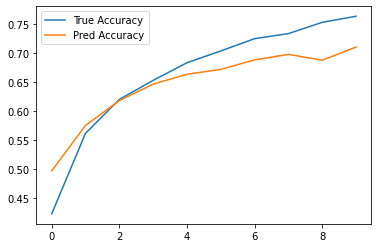

In [167]:
#True accuracy ve pred accuracy değerlerinin incelenmesi
plt.plot(history.history["accuracy"],label="True Accuracy")
plt.plot(history.history["val_accuracy"],label="Pred Accuracy")
plt.legend();

Uçak


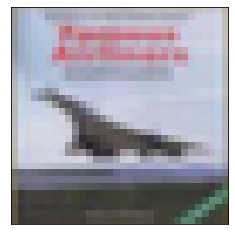

In [178]:
#10. resimi ekrana çizdirdim
test_image=test_images[3]
plt.xticks([])
plt.yticks([])
plt.imshow(test_image);
print(colum_name[test_labels[3][0]])

In [179]:
#10. resmi tahmin ettirdim.
pred=model.predict(test_image.reshape(1,32,32,3))
df=pd.DataFrame(pred,columns=["Uçak","Otomobil","Kuş","Kedi","Geyik","Köpek","Kurbağa","At","Gemi","Kamyon"])
columns=["Uçak","Otomobil","Kuş","Kedi","Geyik","Köpek","Kurbağa","At","Gemi","Kamyon"]
deger=0
for i in columns:
  deger1=df[i][0]
  if deger1>deger:
    deger=deger1
    print(i)

Uçak
